In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [24]:
df_bed = pd.read_csv("39Hz_Accelerometer.csv",names=["time","acc"])
df_bed.head(5)
acc_list = df_bed["acc"]
acc_list = acc_list *1000 - 1000
acc_list = np.array(acc_list)
acc_list_mean = np.mean(acc_list)
acc_list = acc_list - acc_list_mean
acc_list 

array([-2.35935319, -0.27471649,  2.64076131, ...,  1.05384721,
        0.95571411,  1.62395371])

In [21]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise



# dim_x 状态向量size
# dim_z 测量向量size

my_filter = KalmanFilter(dim_x=2, dim_z=1)

# x 这个初始值不是非常重要，因为迭代几次后会接近于真实值
my_filter.x = np.array([[0.],[0.]])

# p 这个初始值不是非常重要，因为迭代几次后会接近于真实值
# p 建议1001，假设他们没关系
my_filter.P = np.array([[1.,0.],[0.,1.]])

# F 因为每秒采一次样，所以dt填1
my_filter.F = np.array([[1.,1.],[0.,1.]])  

# Q 状态转移协方差矩阵 因为我们对F非常确定，觉得F一定不会出错，所以Q方差设的很小
my_filter.Q = np.array([[0.0001,0.],[0.,0.0001]])  
# 观测矩阵 Hx = p
# 观测矩阵的左边一项不能设置成0
my_filter.H = np.array([[1,0]])
# 因为上面噪声设置的是方差为1的噪声，所以这里也是1    （为什么）
my_filter.R = 1 




In [29]:
z_new_list = []
v_new_list = []
for k in range(len(acc_list)):
    my_filter.predict()
    my_filter.update(acc_list[k])
    # do something with the output
    x = my_filter.x
    z_new_list.append(x[0][0])
    v_new_list.append(x[1][0])

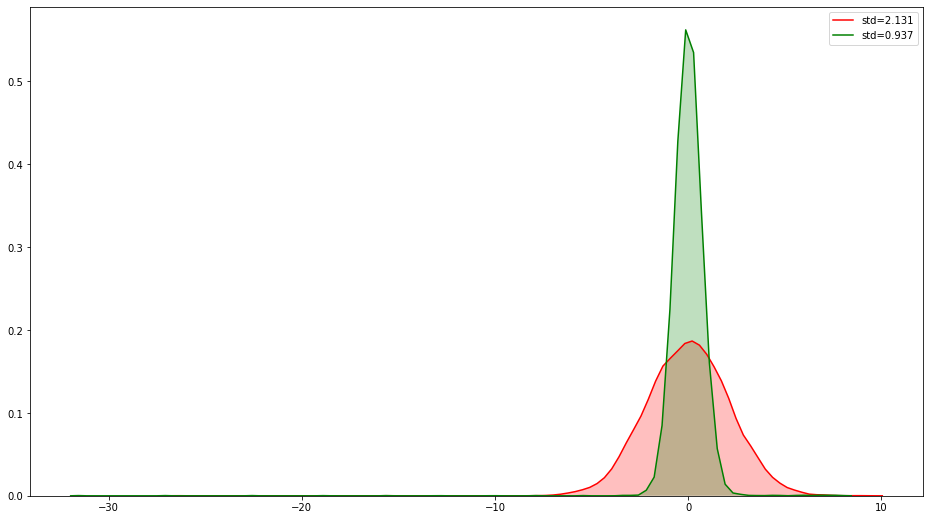

In [40]:
acc_list_std = np.std(acc_list)
acc_list_avg = np.mean(acc_list)
acc_filterd_list_std = np.std(z_new_list)
import seaborn as sns
plt.figure(figsize=(16,9))
ax = sns.kdeplot(acc_list,shade=True,color="r",label="std=%.3f"%acc_list_std)
ax = sns.kdeplot(z_new_list,shade=True,color="g",label="std=%.3f"%acc_filterd_list_std)

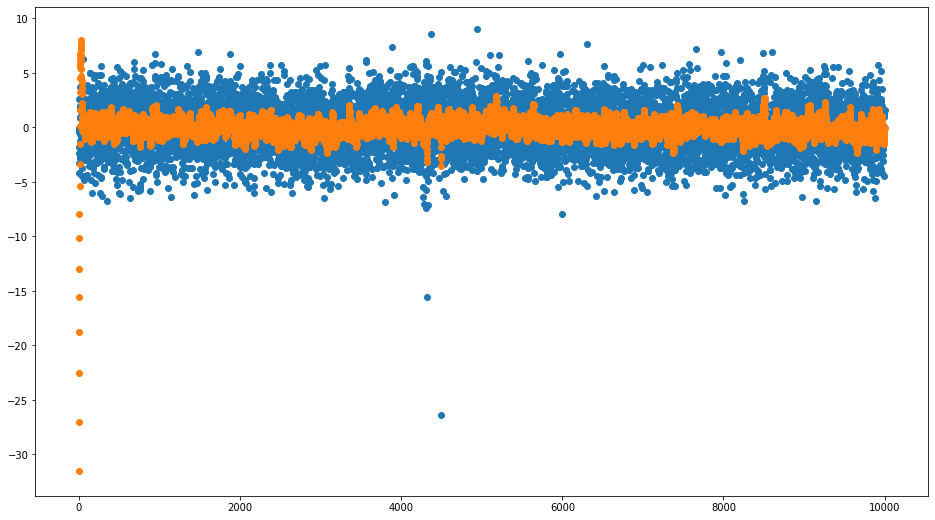

In [49]:
plt.figure(figsize=(16,9))

plt.scatter(range(len(acc_list)),acc_list)
plt.scatter(range(len(z_new_list)),z_new_list)

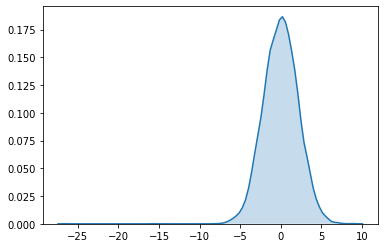

In [31]:
sns.kdeplot(acc_list,shade=True)